<a href="https://colab.research.google.com/github/AkashSasikumar47/stock-transaction-assistant/blob/main/StockGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_excel('stock20.xlsx')
print(df)
print(df.columns)

     GeneratedStockName DocType  Doc_No   Doc_Date S_Type  Div  Loc  Qty  \
0     LTNB515CRD34SMGTI   SIBT1   17205 2023-08-25  SMGTI    1  102   -1   
1      LTJ&JOTRD34SMGTO  SICCS4    2937 2023-08-25  SMGTO    4  404   -1   
2    LTDLVE0024D34SMGTO  SICCS4    2936 2023-08-25  SMGTO    4  404   -4   
3    LTCRCE0007D34SMGTO  SICCS4    2935 2023-08-25  SMGTO    4  404   -2   
4         LTKITD34SMGTO  SICCS4    2934 2023-08-25  SMGTO    4  404   -6   
5    LTJ&J1-200D34SMGTO  SICCS4    2934 2023-08-25  SMGTO    4  404   -2   
6    LTJ&J1-175D34SMGTO  SICCS4    2934 2023-08-25  SMGTO    4  404   -2   
7   LTNSAC18VTLD34SMGTI   SIBT1   17204 2023-08-25  SMGTI    1  101   -1   
8         LTF40D34SMGTI   SIBT1   17203 2023-08-25  SMGTI    1  102   -1   
9   LTNWM1000FSD34SMGTI   SIBT1   17202 2023-08-25  SMGTI    1  101   -1   
10  LTNCFP418GPD34SMGTI   SIBT1   17202 2023-08-25  SMGTI    1  101   -1   
11    LTNBF128RD34SMGTI   SIBT1   17201 2023-08-25  SMGTI    1  101   -3   
12      LTNF

In [ ]:
df.to_csv('out.csv')

In [1]:
import google.generativeai as genai
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata

from google.colab import userdata
API_KEY=userdata.get('GeminiAPI')
genai.configure(api_key=API_KEY)

myfile = genai.upload_file(path="out.csv", display_name="stock.csv")
print(f"{myfile=}")

model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

while True:
    prompt = input("Ask me anything: ")
    if (prompt == "exit"):
        break
   # response = chat.send_message(prompt, stream=True)
    result = model.generate_content(
    [myfile, "\n\n", prompt]
)
    for chunk in result:
        if chunk.text:
          print(chunk.text)

myfile=genai.File({
    'name': 'files/lkdz252v144j',
    'display_name': 'stock.csv',
    'mime_type': 'text/csv',
    'sha256_hash': 'YjkxZDU1ZDNhZjdiN2IwYTljZTA4MTdjNDhhNWM5ZjJmMjk5MWFhM2E3YjE4MzZhZTJhOTRmYjI4NjQ4ODVkZA==',
    'size_bytes': '4079',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/lkdz252v144j',
    'create_time': '2024-12-09T12:24:56.283454Z',
    'expiration_time': '2024-12-11T12:24:56.217278229Z',
    'update_time': '2024-12-09T12:24:56.283454Z'})
Ask me anything: What is the maximum profit?
The maximum profit shown in the provided data is 562.93.  This is from the sale of  LTNSAC18VTLD34SMGTI (Air Conditioning, Split AC).

Ask me anything: exit


In [2]:
import google.generativeai as genai
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata

from google.colab import userdata
API_KEY=userdata.get('GeminiAPI')
genai.configure(api_key=API_KEY)

myfile = genai.upload_file(path="out.csv", display_name="stock.csv")
print(f"{myfile=}")

model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

description = """
You are an ERP assistant for analyzing stock transaction data in a corporate system. Your task is to help the user by processing their queries related to stock transactions using the following dataset:

Dataset Columns:
- GeneratedStockName: Name of the stock.
- DocType: Type of document (e.g., purchase, sale).
- Doc_No: Document number.
- Doc_Date: Document date.
- S_Type: Stock type (e.g., raw material, finished goods).
- Div: Division where the stock is categorized.
- Loc: Location of the stock.
- Qty: Quantity of stock available.
- Trn_Rate: Rate at which the stock was transacted.
- Trn_Amount: Total transaction value.
- Cost_Rate: Cost rate of the stock.
- Cost_Value: Total cost of the stock.
- GP: Gross profit.
- Row_Type: Type of row (e.g., data entry row).
- DocSr: Document series.
- UOM: Unit of measurement.
- Consider_for_Costing: Whether this item should be included in costing (True/False).
- Doc_Year: Year of the transaction.
- Costing_Sequence: Sequence number for costing.
- Division_Name: Name of the division where stock belongs.
- Brand_Name: Brand of the stock.
- Category_Name: Category of the stock.
- Sub_Category: Sub-category for more detailed classification.
- SDT: Stock date (date when stock was recorded).
- Reorder_Level: Minimum stock level before reorder is needed.
- Reorder_Size: Quantity to reorder.
- Minimum_Level: Minimum stock level to keep.
- Lead_Time: Time for replenishment of stock (in days).

Your task is to help users with the following basic operations using this dataset:

1. **Stock Queries:**
    - Get current stock details based on the stock name, division, or location.
    - Identify stock items that need to be reordered based on quantity and reorder level.
    - Get stock details for specific time periods (e.g., by month, year, or date range).

2. **Profitability Analysis:**
    - Calculate gross profit by subtracting the cost value from the transaction amount.
    - Calculate profit margins (gross profit / transaction amount) for each stock item.
    - Summarize total gross profit by stock category, division, or brand.

3. **Reorder Recommendations:**
    - Identify which stock items are below the reorder level and recommend reorder quantities.
    - Track stock that has crossed the reorder level and provide alerts.

4. **Costing Analysis:**
    - Calculate the total cost of stock items based on the cost rate and quantity.
    - Filter items based on whether they are considered for costing (True/False).

5. **Trend Analysis:**
    - Provide visualizations of stock trends over time, such as quantity changes, price fluctuations, and profit changes.

For each query, always:
- Use pandas for data manipulation, applying operations like `groupby()`, `pivot_table()`, and `merge()`.
- Generate visualizations using `matplotlib` or `plotly` for graphs, charts, and trend analysis.
- Provide clear, actionable insights along with executable Python code whenever possible.

You should also ask for clarification if the query is ambiguous or if additional context is needed to fulfill the request.
"""
chat.send_message(description)

while True:
    prompt = input("Ask me anything: ")
    if (prompt == "exit"):
        break
   # response = chat.send_message(prompt, stream=True)
    result = model.generate_content(
    [myfile, "\n\n", prompt]
)
    for chunk in result:
        if chunk.text:
          print(chunk.text)

myfile=genai.File({
    'name': 'files/dkhm5zvodlal',
    'display_name': 'stock.csv',
    'mime_type': 'text/csv',
    'sha256_hash': 'YjkxZDU1ZDNhZjdiN2IwYTljZTA4MTdjNDhhNWM5ZjJmMjk5MWFhM2E3YjE4MzZhZTJhOTRmYjI4NjQ4ODVkZA==',
    'size_bytes': '4079',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/dkhm5zvodlal',
    'create_time': '2024-12-09T12:27:20.159613Z',
    'expiration_time': '2024-12-11T12:27:20.092930459Z',
    'update_time': '2024-12-09T12:27:20.159613Z'})
Ask me anything: What is the cost of AIRMATE Fan?
The cost of the AIRMATE Fan (LTF40D34SMGTI) is 100.30.

Ask me anything: How many Fans were sold totally?
Here's the solution:

First, we need to identify rows representing fan sales.  Looking at the data, we can see that several rows indicate sales of fans. We need to sum the quantities sold for each fan type.

* **LTNF150D34SMGTI (Stand Fan):** Sold 1 (row 12).  Also shown as a stock transfer in row 17 and 18, but this is not a 

myfile=genai.File({
    'name': 'files/q44c7w63hpj',
    'display_name': 'stock.csv',
    'mime_type': 'text/csv',
    'sha256_hash': 'YjkxZDU1ZDNhZjdiN2IwYTljZTA4MTdjNDhhNWM5ZjJmMjk5MWFhM2E3YjE4MzZhZTJhOTRmYjI4NjQ4ODVkZA==',
    'size_bytes': '4079',
    'state': 'ACTIVE',
    'uri': 'https://generativelanguage.googleapis.com/v1beta/files/q44c7w63hpj',
    'create_time': '2024-12-09T12:37:24.912279Z',
    'expiration_time': '2024-12-11T12:37:24.853716103Z',
    'update_time': '2024-12-09T12:37:24.912279Z'})
Enter the type of plot (line, bar, pie, scatter, hist) or 'exit' to quit: line
Enter the x-axis column name (leave blank for bar/pie): Doc_Date
Enter the y-axis column name: Qty
Enter the column to group by (for bar/pie plots): 
Enter filters as key=value pairs separated by commas (e.g., Division_Name=Electronics): 


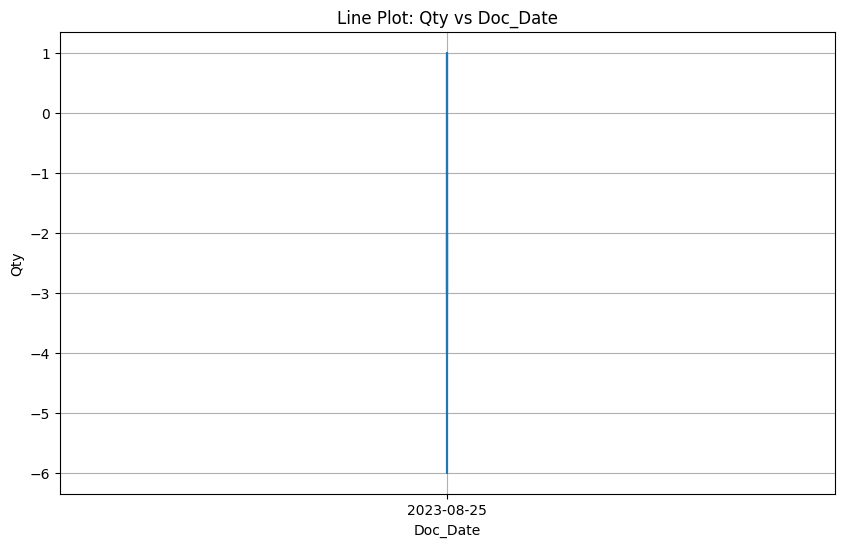

Plot generated successfully.
Enter the type of plot (line, bar, pie, scatter, hist) or 'exit' to quit: bar
Enter the x-axis column name (leave blank for bar/pie): 
Enter the y-axis column name: GP
Enter the column to group by (for bar/pie plots): Category_Name
Enter filters as key=value pairs separated by commas (e.g., Division_Name=Electronics): 


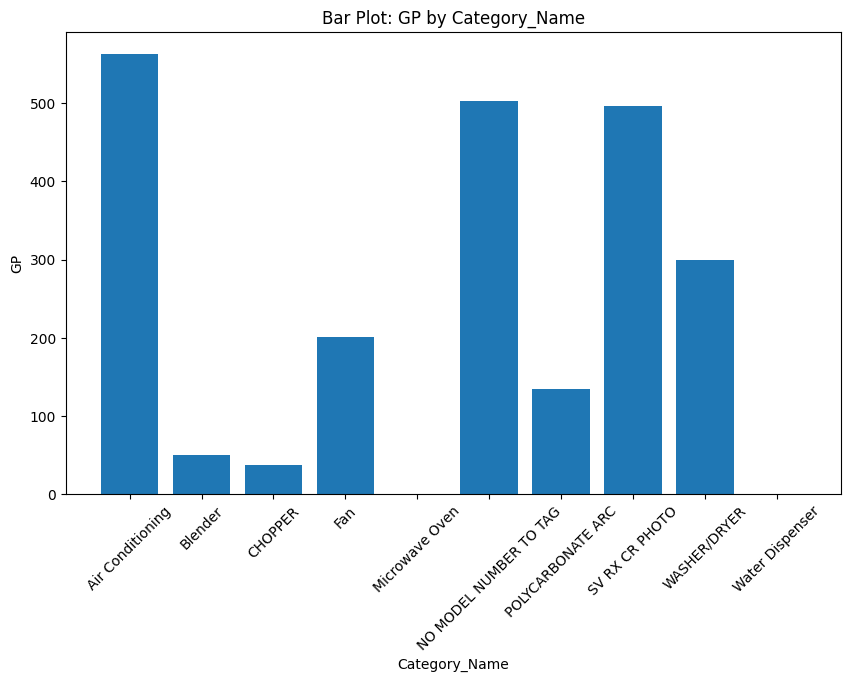

Plot generated successfully.
Enter the type of plot (line, bar, pie, scatter, hist) or 'exit' to quit: pie
Enter the x-axis column name (leave blank for bar/pie): 
Enter the y-axis column name: Qty
Enter the column to group by (for bar/pie plots): Division_Name
Enter filters as key=value pairs separated by commas (e.g., Division_Name=Electronics): 


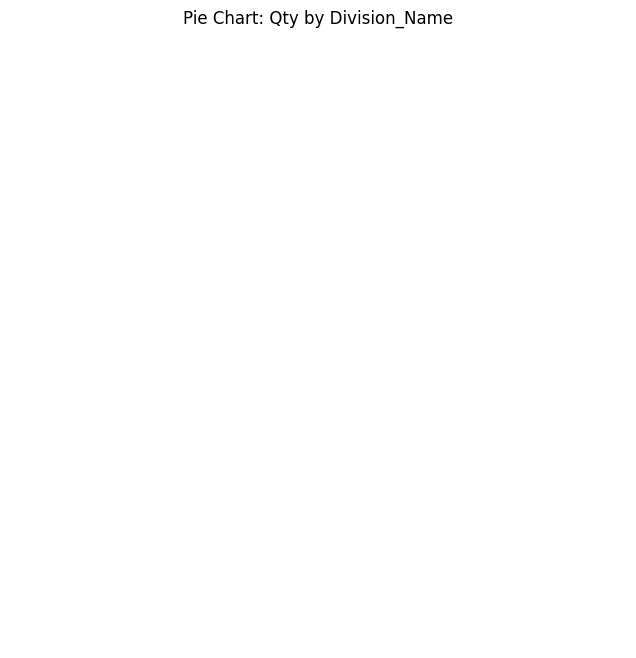

Plot generated successfully.
Enter the type of plot (line, bar, pie, scatter, hist) or 'exit' to quit: scatter
Enter the x-axis column name (leave blank for bar/pie): Trn_Rate
Enter the y-axis column name: GP
Enter the column to group by (for bar/pie plots): 
Enter filters as key=value pairs separated by commas (e.g., Division_Name=Electronics): 


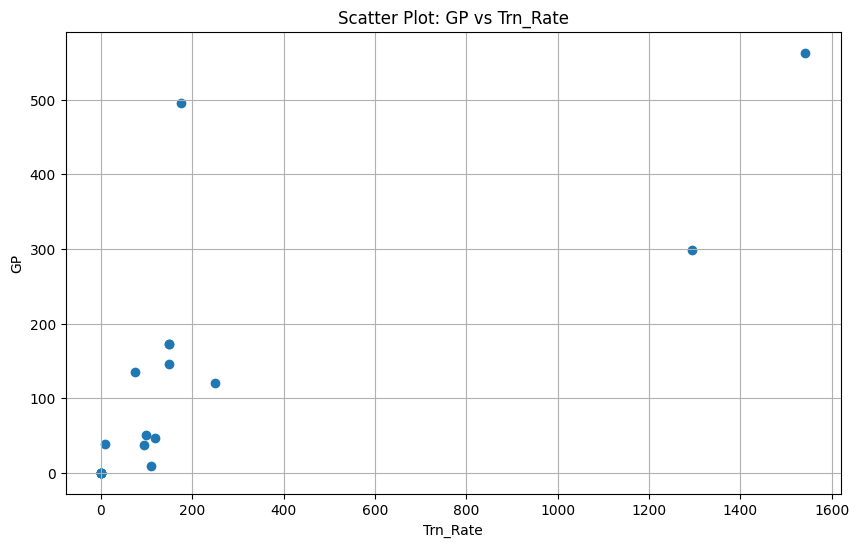

Plot generated successfully.
Enter the type of plot (line, bar, pie, scatter, hist) or 'exit' to quit: hist
Enter the x-axis column name (leave blank for bar/pie): Qty
Enter the y-axis column name: 
Enter the column to group by (for bar/pie plots): 
Enter filters as key=value pairs separated by commas (e.g., Division_Name=Electronics): 


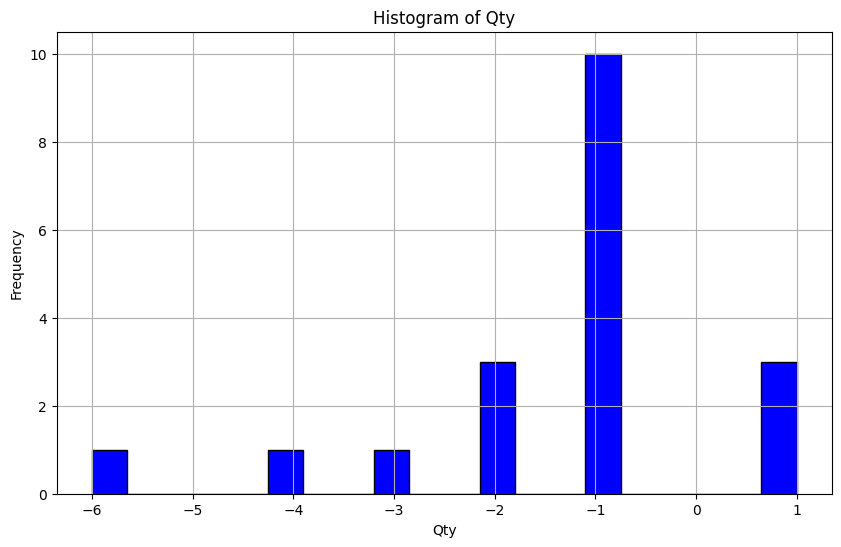

Plot generated successfully.
Enter the type of plot (line, bar, pie, scatter, hist) or 'exit' to quit: exit
Exiting the plot assistant. Goodbye!


In [1]:
import google.generativeai as genai
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata

from google.colab import userdata
API_KEY=userdata.get('GeminiAPI')
genai.configure(api_key=API_KEY)

myfile = genai.upload_file(path="out.csv", display_name="stock.csv")
print(f"{myfile=}")

model = genai.GenerativeModel('gemini-1.5-flash')
chat = model.start_chat(history=[])

description = """
You are an ERP assistant for analyzing stock transaction data in a corporate system. Your task is to help the user by processing their queries related to stock transactions using the following dataset:

Dataset Columns:
- GeneratedStockName: Name of the stock.
- DocType: Type of document (e.g., purchase, sale).
- Doc_No: Document number.
- Doc_Date: Document date.
- S_Type: Stock type (e.g., raw material, finished goods).
- Div: Division where the stock is categorized.
- Loc: Location of the stock.
- Qty: Quantity of stock available.
- Trn_Rate: Rate at which the stock was transacted.
- Trn_Amount: Total transaction value.
- Cost_Rate: Cost rate of the stock.
- Cost_Value: Total cost of the stock.
- GP: Gross profit.
- Row_Type: Type of row (e.g., data entry row).
- DocSr: Document series.
- UOM: Unit of measurement.
- Consider_for_Costing: Whether this item should be included in costing (True/False).
- Doc_Year: Year of the transaction.
- Costing_Sequence: Sequence number for costing.
- Division_Name: Name of the division where stock belongs.
- Brand_Name: Brand of the stock.
- Category_Name: Category of the stock.
- Sub_Category: Sub-category for more detailed classification.
- SDT: Stock date (date when stock was recorded).
- Reorder_Level: Minimum stock level before reorder is needed.
- Reorder_Size: Quantity to reorder.
- Minimum_Level: Minimum stock level to keep.
- Lead_Time: Time for replenishment of stock (in days).

Your task is to help users with the following basic operations using this dataset:

1. **Stock Queries:**
    - Get current stock details based on the stock name, division, or location.
    - Identify stock items that need to be reordered based on quantity and reorder level.
    - Get stock details for specific time periods (e.g., by month, year, or date range).

2. **Profitability Analysis:**
    - Calculate gross profit by subtracting the cost value from the transaction amount.
    - Calculate profit margins (gross profit / transaction amount) for each stock item.
    - Summarize total gross profit by stock category, division, or brand.

3. **Reorder Recommendations:**
    - Identify which stock items are below the reorder level and recommend reorder quantities.
    - Track stock that has crossed the reorder level and provide alerts.

4. **Costing Analysis:**
    - Calculate the total cost of stock items based on the cost rate and quantity.
    - Filter items based on whether they are considered for costing (True/False).

5. **Trend Analysis:**
    - Provide visualizations of stock trends over time, such as quantity changes, price fluctuations, and profit changes.

For each query, always:
- Use pandas for data manipulation, applying operations like `groupby()`, `pivot_table()`, and `merge()`.
- Generate visualizations using `matplotlib` or `plotly` for graphs, charts, and trend analysis.
- Provide clear, actionable insights along with executable Python code whenever possible.

You should also ask for clarification if the query is ambiguous or if additional context is needed to fulfill the request.
"""
chat.send_message(description)

plot_instructions = """
You are an ERP assistant that autonomously generates graphs based on stock transaction data.
- Analyze user queries to identify the required graph type and relevant columns.
- Dynamically generate Python code for data processing and visualization.
- Execute the generated code to display the graph and share the code for reproducibility.

Supported Graph Types:
1. Line Plot: For trends over time.
2. Bar Plot: For comparisons across categories or groups.
3. Pie Chart: For proportions.
4. Scatter Plot: For correlations between two metrics.
5. Histogram: For distributions of numeric data.

Always:
1. Validate the query and clarify ambiguous instructions.
2. Dynamically generate and execute Python code for the requested graph.
3. Display the graph inline and provide the code used for plotting.
4. Ensure all plots are well-labeled with titles, axes, and legends.

Example Queries:
- "Show a line plot of stock quantity over time."
- "Plot a bar graph comparing gross profit by category."
- "Create a pie chart of stock proportions by division."
"""
chat.send_message(plot_instructions)

def universal_plot(data, plot_type, x_column=None, y_column=None, group_by=None, filters=None, **kwargs):
    if filters:
        for col, val in filters.items():
            data = data[data[col] == val]

    if plot_type == "line":
        if x_column and y_column:
            plt.figure(figsize=(10, 6))
            plt.plot(data[x_column], data[y_column], **kwargs)
            plt.title(f"Line Plot: {y_column} vs {x_column}")
            plt.xlabel(x_column)
            plt.ylabel(y_column)
            plt.grid(True)
            plt.show()
        else:
            return "For a line plot, please specify both x_column and y_column."

    elif plot_type == "bar":
        if group_by and y_column:
            grouped_data = data.groupby(group_by)[y_column].sum().reset_index()
            plt.figure(figsize=(10, 6))
            plt.bar(grouped_data[group_by], grouped_data[y_column], **kwargs)
            plt.title(f"Bar Plot: {y_column} by {group_by}")
            plt.xlabel(group_by)
            plt.ylabel(y_column)
            plt.xticks(rotation=45)
            plt.show()
        else:
            return "For a bar plot, please specify both group_by and y_column."

    elif plot_type == "pie":
        if group_by and y_column:
            grouped_data = data.groupby(group_by)[y_column].sum()
            plt.figure(figsize=(8, 8))
            plt.pie(grouped_data, labels=grouped_data.index, autopct='%1.1f%%', startangle=140, **kwargs)
            plt.title(f"Pie Chart: {y_column} by {group_by}")
            plt.show()
        else:
            return "For a pie chart, please specify both group_by and y_column."

    elif plot_type == "scatter":
        if x_column and y_column:
            plt.figure(figsize=(10, 6))
            plt.scatter(data[x_column], data[y_column], **kwargs)
            plt.title(f"Scatter Plot: {y_column} vs {x_column}")
            plt.xlabel(x_column)
            plt.ylabel(y_column)
            plt.grid(True)
            plt.show()
        else:
            return "For a scatter plot, please specify both x_column and y_column."

    elif plot_type == "hist":
        if x_column:
            plt.figure(figsize=(10, 6))
            plt.hist(data[x_column], bins=kwargs.get("bins", 20), color=kwargs.get("color", "blue"), edgecolor="black")
            plt.title(f"Histogram of {x_column}")
            plt.xlabel(x_column)
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()
        else:
            return "For a histogram, please specify x_column."

    else:
        return "Invalid plot type. Supported types are: line, bar, pie, scatter, hist."

    return "Plot generated successfully."

df = pd.read_csv("out.csv")

while True:
    plot_type = input("Enter the type of plot (line, bar, pie, scatter, hist) or 'exit' to quit: ").lower()
    if plot_type == "exit":
        print("Exiting the plot assistant. Goodbye!")
        break
    x_column = input("Enter the x-axis column name (leave blank for bar/pie): ").strip() or None
    y_column = input("Enter the y-axis column name: ").strip() or None
    group_by = input("Enter the column to group by (for bar/pie plots): ").strip() or None

    filters_input = input("Enter filters as key=value pairs separated by commas (e.g., Division_Name=Electronics): ").strip()
    filters = {k: v for k, v in (item.split('=') for item in filters_input.split(','))} if filters_input else None

    response = universal_plot(df, plot_type, x_column=x_column, y_column=y_column, group_by=group_by, filters=filters)
    if response:
        print(response)